In [57]:
import numpy as np
import random as r
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend

In [58]:
def ones(value):
    n = 0
    while value:
        n += 1
        value &= value-1
    return n

def threshold(value, window, adapt):

    mask = (1<<window)-1
    value = ones(value & mask)
    return value >= adapt

def plot(I, O, **kwargs):
    count = 2 + len(kwargs)
    fig, axes = plt.subplots(count, 1, sharex=True,figsize=(12,3))
    ax1=axes[0]
    ax2=axes[1]

    ax1.step(time, I, 'b-') # y label
    ax2.step(time, O, 'r-')
   

    axes[-1].set_xlabel('time') # x label

    ax1.set_ylabel('Input', color='b')
    ax2.set_ylabel('Output', color='r')
    
    c = 2
    for k, v in kwargs.items():
        ax = axes[c]
        c+=1
        ax.step(time,v)
        ax.set_ylabel(k)
        

    plt.show()   

[38, 138]

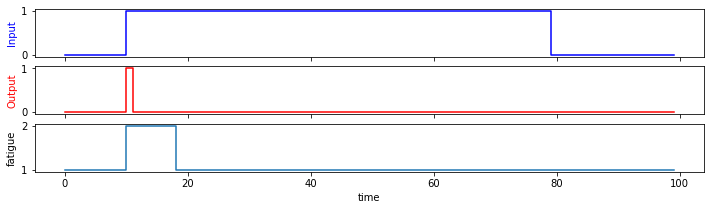

In [56]:
time=np.arange(0,100,1)
size = ((len(time)))
I=np.zeros(size)
O=np.zeros(size)
d1=np.zeros(size)
d2=np.zeros(size)



potential = 0



# const
limit = 7
mask = (1<<limit) - 1
MIN_FATIGUE=1
# vars
state_p = 0 # potential
state_n = 0
fatigue = MIN_FATIGUE 
recovery = 0

receptors = [r.getrandbits(8), r.getrandbits(8)]

potential = 8

mediator = r.getrandbits(8)

for k in range (0,len(time)):

    if k>10 and k < len(time)-20:
        
        I[k] = 1
        signal = 255
    else:
        signal=0
    
    
    
    
    state_p = ((state_p << 1) | (receptors[0] & signal)) & mask
    state_n = ((state_n << 1) | (receptors[1] & signal)) & mask

    fatigue = min(fatigue, limit)
    
    
    
    activate = ones(state_p & (~state_n)) >= fatigue

    if activate:
        O[k] = 1
        state_p = 0
 
        fatigue += 1
        recovery=0
        
    if recovery>=8:
        recovery=0
        fatigue=max(MIN_FATIGUE, fatigue-1)    
        
    if fatigue:
        recovery+=1
        
        
    d1[k]=fatigue
        
plot(I, O, fatigue=d1)